In [1]:
#1.DATA PREPROCESSING



In [2]:
##a.import libraries
import pandas as pd
import numpy as np

In [3]:
##b.import data
audit_risk=pd.read_csv('audit_risk.csv')
trial=pd.read_csv('trial.csv')


In [4]:
import os
print(os.getcwd())


/Users/mariamcoulibaly/Downloads


In [5]:
##c.merge data
audit=pd.merge(audit_risk,trial,right_index=True,left_index=True)
print(audit)
audit.head()


     Sector_score_x LOCATION_ID_x  PARA_A_x  Score_A  Risk_A  PARA_B_x  \
0              3.89            23      4.18      0.6   2.508    2.5000   
1              3.89             6      0.00      0.2   0.000    4.8300   
2              3.89             6      0.51      0.2   0.102    0.2300   
3              3.89             6      0.00      0.2   0.000   10.8000   
4              3.89             6      0.00      0.2   0.000    0.0800   
5              3.89             6      0.00      0.2   0.000    0.8300   
6              3.89             7      1.10      0.4   0.440    7.4100   
7              3.89             8      8.50      0.6   5.100   12.0300   
8              3.89             8      8.40      0.6   5.040   11.0500   
9              3.89             8      3.98      0.6   2.388    0.9900   
10             3.89             8      5.43      0.6   3.258   10.7700   
11             3.89             8     15.38      0.6   9.228   40.1400   
12             3.89             8     

,Sector_score_x,LOCATION_ID_x,PARA_A_x,Score_A,Risk_A,PARA_B_x,Score_B,Risk_B,TOTAL_x,numbers_x,...,Marks,Money_Value_y,MONEY_Marks,District,Loss,LOSS_SCORE,History_y,History_score,Score_y,Risk_y
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
auditnew=audit.drop(['Sector_score_y','LOCATION_ID_y','PARA_A_y','PARA_B_y' ,'TOTAL_y','numbers_y','Money_Value_y','History_y','Score_y','Risk_y'],axis=1)

In [7]:
print(auditnew)



     Sector_score_x LOCATION_ID_x  PARA_A_x  Score_A  Risk_A  PARA_B_x  \
0              3.89            23      4.18      0.6   2.508    2.5000   
1              3.89             6      0.00      0.2   0.000    4.8300   
2              3.89             6      0.51      0.2   0.102    0.2300   
3              3.89             6      0.00      0.2   0.000   10.8000   
4              3.89             6      0.00      0.2   0.000    0.0800   
5              3.89             6      0.00      0.2   0.000    0.8300   
6              3.89             7      1.10      0.4   0.440    7.4100   
7              3.89             8      8.50      0.6   5.100   12.0300   
8              3.89             8      8.40      0.6   5.040   11.0500   
9              3.89             8      3.98      0.6   2.388    0.9900   
10             3.89             8      5.43      0.6   3.258   10.7700   
11             3.89             8     15.38      0.6   9.228   40.1400   
12             3.89             8     

In [8]:
##d-taking care of missing values
auditnew.columns[auditnew.isnull().any()]

Index(['Money_Value_x'], dtype='object')

In [9]:
auditnew['Money_Value_x'].fillna(auditnew['Money_Value_x'].mean(),inplace=True)

In [10]:
auditnew.columns[auditnew.isnull().any()]

Index([], dtype='object')

In [11]:
auditnew.dtypes

Sector_score_x    float64
LOCATION_ID_x      object
PARA_A_x          float64
Score_A           float64
Risk_A            float64
PARA_B_x          float64
Score_B           float64
Risk_B            float64
TOTAL_x           float64
numbers_x         float64
Score_B.1         float64
Risk_C            float64
Money_Value_x     float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History_x           int64
Prob              float64
Risk_F            float64
Score_x           float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk_x              int64
SCORE_A             int64
SCORE_B             int64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
dtype: object

In [12]:
###delete rows with location_ID 'LOHARU' 'NUH' 'SAFIDON'
auditne=auditnew[auditnew['LOCATION_ID_x'] !='LOHARU']
auditn=auditne[auditne['LOCATION_ID_x'] !='NUH']
auditnw=auditn[auditn['LOCATION_ID_x'] !='SAFIDON']
auditnw.shape


(773, 35)

In [13]:
#show statistics
auditnw.describe()

,Sector_score_x,PARA_A_x,Score_A,Risk_A,PARA_B_x,Score_B,Risk_B,TOTAL_x,numbers_x,Score_B.1,...,Audit_Risk,Risk_x,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,...,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,20.255149,2.457983,0.351876,1.355928,10.841903,0.313583,6.358590,13.268062,5.067917,0.223803,...,7.194763,0.394567,3.518758,3.135834,2.238034,2.913325,2.507115,0.029754,2.062096,2.168176
std,24.339709,5.688509,0.174137,3.446223,50.176308,0.169987,30.128623,51.406241,0.264928,0.080494,...,38.740186,0.489074,1.741366,1.699869,0.804941,1.599544,1.230659,0.184628,0.375788,0.681108
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.280000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,0.200000,...,0.316800,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.390000,5.000000,0.200000,...,0.577600,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.980000,7.760000,5.000000,0.200000,...,3.258000,1.000000,6.000000,4.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,961.514400,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [14]:
#REGRESSION TASK

In [15]:
##1.define X and Y
X=pd.DataFrame(auditnw)
X = X.drop(['Audit_Risk'], axis=1)
Y= pd.DataFrame(auditnw['Audit_Risk'])
X.head()
Y.head()


,Audit_Risk
0,1.7148
1,0.5108
2,0.3096
3,3.5060
4,0.2832


In [16]:
##2.load libraries

from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import sklearn

In [17]:
##3.train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)

In [18]:
##4.feature scaling
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
##5.models application

f = open('Project1.csv', 'w')
line  = 'Model_name,Model_params,Model_params,Model_params,Mean_train_score,Mean_test_score,roc_auc_score,accuracy_score\n'
f.write(line)
f.close()

In [20]:
###a.knn regressor

####a1.apply model

from sklearn.neighbors import KNeighborsRegressor

#-create KNN regressor
knn_reg = KNeighborsRegressor()

####a2.find best parameter(s)

#-create space of candidate values 

search_space=[{"n_neighbors":range(1,10)}]

#-create grid search 
knn_regressor=GridSearchCV(knn_reg,search_space,cv=3,verbose=0)
knn_regressor.fit(X_train,Y_train)

#-best neighborhood size (k)
print(knn_regressor.best_params_)
print("Best cross-validation score: {:.2f}".format(knn_regressor.best_score_))


{'n_neighbors': 2}
Best cross-validation score: 0.53


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


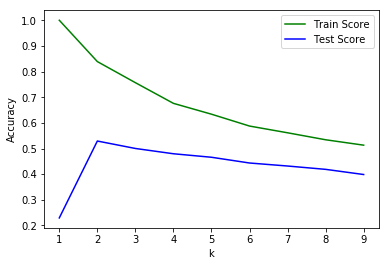

In [21]:
#plot grid scores 

x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis,knn_regressor.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, knn_regressor.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

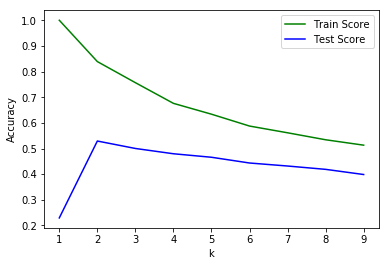

In [22]:
#plot grid scores 

x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis,knn_regressor.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, knn_regressor.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [23]:
print('Mean train score: {}'.format(knn_regressor.cv_results_['mean_train_score']))
print('Mean test score: {}'.format(knn_regressor.cv_results_['mean_test_score']))



Mean train score: [1.         0.83883317 0.75661631 0.67599651 0.63374336 0.5875283
 0.56125308 0.53406264 0.51301491]
Mean test score: [0.22942536 0.52915182 0.50015665 0.47952881 0.4658698  0.44348826
 0.43173518 0.41873218 0.39860371]


In [24]:
####a3.average mean training score and test score with best parameter

knn=KNeighborsRegressor(n_neighbors=2)
cv=cross_validate(knn,X_train,Y_train,cv=3,fit_params=None, return_train_score=True)
print(cv)
print('Mean train score: {}'.format(cv['train_score'].mean()))
print('Mean test score: {}'.format(cv['test_score'].mean()))



{'fit_time': array([0.00483918, 0.00158405, 0.0020051 ]), 'score_time': array([0.00542283, 0.00350499, 0.00408697]), 'test_score': array([0.49069387, 0.68080651, 0.41595508]), 'train_score': array([0.78483783, 0.79173101, 0.93993066])}
Mean train score: 0.8388331669794885
Mean test score: 0.5291518214674682


In [25]:
line = 'Knn regressor'+','+str(knn_regressor.best_params_) +','+','+','+ str(cv['train_score'].mean()) + ',' + str(cv['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [26]:
###b.linear regression
####b1.apply model

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)
print(lreg.score(X_train, Y_train))
print(lreg.score(X_test, Y_test))


0.8618628994950729
0.5193132518612715


In [27]:
####b2.average mean training score and test score 

#cross-validation

cv_results = cross_validate(lreg, X_train,Y_train,cv=3,fit_params=None, return_train_score=True, return_estimator=True)
print (cv_results)

#average mean training score and test score 

print('Mean train score: {}'.format(cv_results['train_score'].mean()))

print('Mean test score: {}'.format(cv_results['test_score'].mean()))



{'fit_time': array([0.00464916, 0.00331712, 0.00353479]), 'score_time': array([0.00183582, 0.00098681, 0.001652  ]), 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)), 'test_score': array([0.67625278, 0.8724169 , 0.55203086]), 'train_score': array([0.89112123, 0.81348628, 0.93192726])}
Mean train score: 0.8788449234253671
Mean test score: 0.700233513106299


In [28]:
line = 'linear regression'+','+',' +','+','+ str(cv_results['train_score'].mean()) + ',' + str(cv_results['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [29]:
###c.Ridge



In [30]:
####c1.apply model

#-create ridge regressor

from  sklearn.linear_model import Ridge
ridge_reg=Ridge()

####c2.find best parameter(s)

#-create space of candidate values 
search_space=[{"alpha":[0.01,0.1,1,10]}]

#-create grid search 
ridge_regressor=GridSearchCV(ridge_reg,search_space,cv=3,verbose=0).fit(X_train,Y_train)

#-best alpha
print(ridge_regressor.best_params_)



{'alpha': 1}


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


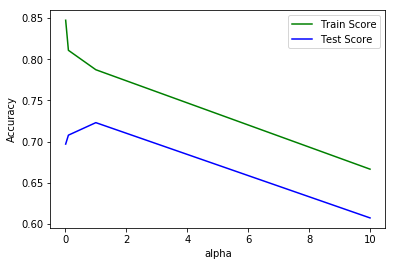

In [31]:
#plot grid scores 

x_axis =[0.01,0.1,1,10]
%matplotlib inline
plt.plot(x_axis,ridge_regressor.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, ridge_regressor.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
####c3.average mean training score and test score with best parameter

ridge_regress=GridSearchCV(ridge_reg,param_grid={'alpha': [1]},cv=3,verbose=0).fit(X_train,Y_train)
print('Mean train score: {}'.format(ridge_regress.cv_results_['mean_train_score']))
print('Mean test score: {}'.format(ridge_regress.cv_results_['mean_test_score']))




Mean train score: [0.7873246]
Mean test score: [0.72303041]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [33]:
ridge=Ridge(alpha=10)
cvridge=cross_validate(ridge_regressor,X_train,Y_train,cv=3,fit_params=None, return_train_score=True,return_estimator=True)
print(cvridge)
print('Mean train score: {}'.format(cvridge['train_score'].mean()))
print('Mean test score: {}'.format(cvridge['test_score'].mean()))




{'fit_time': array([0.06900215, 0.04788017, 0.04741073]), 'score_time': array([0.00089407, 0.00083113, 0.00083923]), 'estimator': (GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0), GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0), GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
line = 'ridge'+','+str(ridge_regressor.best_params_) +','+','+','+ str(cvridge['train_score'].mean()) + ',' + str(cvridge['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [35]:
###d.Lasso

####c1.apply model
#-create lasso regressor
from sklearn.linear_model import Lasso


lasso_reg=Lasso()


####d2.find best parameter(s)

#-create space of candidate values 
search_space=[{"alpha":[0.01,0.1,1,2,3,4,5,6,7,8,9,10]}]


#-create grid search 
lasso_regressor=GridSearchCV(lasso_reg,search_space,cv=3,verbose=0).fit(X_train,Y_train)

#-best alpha
print(lasso_regressor.best_params_)




/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 0.1}


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


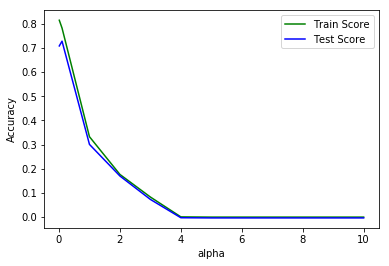

In [36]:
#plot grid scores 

x_axis =[0.01,0.1,1,2,3,4,5,6,7,8,9,10]
%matplotlib inline
plt.plot(x_axis,lasso_regressor.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, lasso_regressor.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [37]:
####d3.average mean training score and test score with best parameter



In [38]:
lasso=Lasso(alpha=0.1)
cvlasso=cross_validate(lasso,X_train,Y_train,cv=3,fit_params=None, return_train_score=True,return_estimator=True)
print(cvlasso)
print('Mean train score: {}'.format(cvlasso['train_score'].mean()))
print('Mean test score: {}'.format(cvlasso['test_score'].mean()))


{'fit_time': array([0.01300907, 0.00262666, 0.00409007]), 'score_time': array([0.00178409, 0.00080419, 0.00084472]), 'estimator': (Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)), 'test_score': array([0.81825264, 0.73913892, 0.62631471]), 'train_score': array([0.75678026, 0.76687641, 0.82306013])}
Mean train score: 0.7822389338552278
Mean test score: 0.7279020925547811


In [39]:
line = 'lasso'+','+str(lasso_regressor.best_params_) +','+','+','+ str(cvlasso['train_score'].mean()) + ',' + str(cvlasso['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [40]:
###e.Polynomial regression

####e1.apply model
#-create Polynomial regressor

from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures()


for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
lreg.fit(X_train_poly, Y_train)
print(lreg.score(X_train_poly, Y_train))
print(lreg.score(X_test_poly, Y_test))







1.0
0.9420215673410579


In [41]:
####e2.average mean training score and test score 

#-cross-validation
cvpoly_results = cross_validate(lreg, X_train_poly,Y_train,cv=3,fit_params=None, return_train_score=True, return_estimator=True)
print (cv_results)

#-average mean training score and test score
cvpoly_results['train_score'] 
print('Mean train score: {}'.format(cvpoly_results['train_score'].mean()))

cvpoly_results['test_score'] 
print('Mean test score: {}'.format(cvpoly_results['test_score'].mean()))




{'fit_time': array([0.00464916, 0.00331712, 0.00353479]), 'score_time': array([0.00183582, 0.00098681, 0.001652  ]), 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)), 'test_score': array([0.67625278, 0.8724169 , 0.55203086]), 'train_score': array([0.89112123, 0.81348628, 0.93192726])}
Mean train score: 1.0
Mean test score: 0.9676732227946095


In [42]:
line = 'polynomial regression'+','+',' +','+','+ str(cvpoly_results['train_score'].mean()) + ',' + str(cvpoly_results['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [43]:
###f. linearSVR
####f1.apply model
#-create linearSVR regressor

from sklearn.svm import LinearSVR
SVRlreg = LinearSVR()
SVRlreg.fit(X_train,Y_train)
####f2.find best parameter(s)

#-create space of candidate values 

search_space=[{'C': [1, 10, 100, 1000]}]

#-create grid search 
SVRl_regressor=GridSearchCV(SVRlreg,search_space,cv=3,verbose=0).fit(X_train,Y_train)

#-best PARAMS
print(SVRl_regressor.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 100}


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWar

In [44]:
####f2.average mean training score and test score with best parameter
#-cross-validation

SVR_regr=LinearSVR(C=100)
cvlsvr_results = cross_validate(SVR_regr, X_train,Y_train,cv=3,fit_params=None, return_train_score=True, return_estimator=True)
print (cvlsvr_results)


#-average mean training score and test score
cvlsvr_results['train_score'] 
print('Mean train score: {}'.format(cvlsvr_results['train_score'].mean()))

cvlsvr_results['test_score'] 
print('Mean test score: {}'.format(cvlsvr_results['test_score'].mean()))






{'fit_time': array([0.03465295, 0.02354002, 0.02214622]), 'score_time': array([0.00162196, 0.00113988, 0.00119185]), 'estimator': (LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0), LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0), LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)), 'test_score': array([0.75001456, 0.68643437, 0.56314687]), 'train_score': array([0.61569327, 0.69926498, 0.72834109])}
Mean train score: 0.6810997802340756
Mean test score: 0.6665319355288618


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataCo

In [45]:
line = 'linearsvr'+','+str(SVRl_regressor.best_params_) +','+','+','+ str(cvlsvr_results['train_score'].mean()) + ',' + str(cvlsvr_results['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [46]:
###g.svr kernel linear and rbf

####g1.apply model
#-create SVR regressor

from sklearn.svm import SVR
SVRreg = SVR()
SVRreg.fit(X_train,Y_train)

####f2.find best parameter(s)

#-create space of candidate values 

search_space=[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
             {'kernel': ['poly'], 'gamma': [1e-3, 1e-4],
                     'degree': [1,2,3,4,5,6,7,8]}]


#-create grid search 
SVR_regressor=GridSearchCV(SVRreg,search_space,cv=3,verbose=0).fit(X_train,Y_train)

#-best PARAMS
print(SVR_regressor.best_params_)



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1000, 'kernel': 'linear'}


In [47]:
####g2.average mean training score and test score with best parameter

#-cross-validation

SVRk_regr=SVR(C=1000,kernel='linear')
cvksvr_results = cross_validate(SVRk_regr, X_train,Y_train,cv=3,fit_params=None, return_train_score=True, return_estimator=True)
print (cvksvr_results)


#-average mean training score and test score
cvksvr_results['train_score'] 
print('Mean train score: {}'.format(cvksvr_results['train_score'].mean()))

cvksvr_results['test_score'] 
print('Mean test score: {}'.format(cvksvr_results['test_score'].mean()))







/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'fit_time': array([2.46969509, 3.15234804, 1.33605409]), 'score_time': array([0.00178576, 0.00212407, 0.00184011]), 'estimator': (SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False), SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False), SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)), 'test_score': array([0.76993267, 0.6959686 , 0.60009498]), 'train_score': array([0.65593549, 0.72200004, 0.76235832])}
Mean train score: 0.7134312846918321
Mean test score: 0.6886654164191345


In [48]:
line = 'kernelsvr'+','+str(SVR_regressor.best_params_)+','+ str(cvksvr_results['train_score'].mean()) + ',' + str(cvksvr_results['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [49]:
###h.Decision Tree Regression

####h1.apply model
#-create Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)

#-create space of candidate values 

search_space=[{'max_features': ['sqrt', 'log2', None],
                             'max_depth': range(2,200)}]

#-create grid search 
tree_regressor=GridSearchCV(tree,search_space,cv=5,verbose=0).fit(X_train,Y_train)

#best PARAMS
print(tree_regressor.best_params_)






{'max_depth': 12, 'max_features': None}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
####h2.average mean training score and test score with best parameter

#-cross-validation

tree_reg=DecisionTreeRegressor(random_state=0,max_depth=12,max_features=None)
cvtree_results = cross_validate(tree_reg, X_train,Y_train,cv=5,fit_params=None, return_train_score=True, return_estimator=True)


In [51]:
#-average mean training score and test score


print (cvtree_results)
cvtree_results['train_score'] 
print('Mean train score: {}'.format(cvtree_results['train_score'].mean()))

cvtree_results['test_score'] 
print('Mean test score: {}'.format(cvtree_results['test_score'].mean()))



{'fit_time': array([0.00775194, 0.00831509, 0.0060811 , 0.00536203, 0.0049479 ]), 'score_time': array([0.00121617, 0.00135207, 0.00104499, 0.00149918, 0.00079799]), 'estimator': (DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_s

In [52]:
line = 'decisiontree regressor'+','+str(tree_regressor.best_params_)+','+','+ str(cvtree_results['train_score'].mean()) + ',' + str(cvtree_results['test_score'].mean()) +','+',' '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()

In [53]:
##FIND BEST REGRESSOR

In [54]:
###calculate r square for each regressor 
from sklearn.model_selection import cross_val_score

In [55]:
#knn regressor
cross_val_score(knn,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5291518214674681

In [56]:
#linear regression
cross_val_score(lreg,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.700233513106299

In [57]:
#ridge
cross_val_score(ridge,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6072655853612233

In [58]:
#lasso
cross_val_score(lasso,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7279020925547811

In [59]:
#polynomial
cross_val_score(lreg,X_train_poly,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9676732227946095

In [60]:
#linearSVR
cross_val_score(SVR_regr,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anac

0.6674948024133004

In [61]:
#kernel SVR
cross_val_score(SVRk_regr,X_train,Y_train,scoring='r2').mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.6886654164191345

In [62]:
#decision tree
cross_val_score(tree_reg,X_train,Y_train,scoring='r2').mean()



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6595152254350533

In [63]:
###best regressor
#the kernel SVM produces the greatest r square and is by this way the best regressor 


In [64]:
##TRAIN MODEL WITH BEST REGRESSOR AND BEST PARAMETERS
from sklearn.metrics import r2_score
modeln=DecisionTreeRegressor(random_state=0,max_depth=12,max_features=None).fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(modeln.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(modeln.score(X_test, Y_test)))
predictions = modeln.predict(X_test)
print (r2_score(Y_test, predictions))



Accuracy on training set: 0.511
Accuracy on test set: 0.343
0.3434774258126382


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
####classification


In [66]:
#define X and Y
Xc=pd.DataFrame(auditnw)
Xc = Xc.drop(['Risk_x'], axis=1)
Yc= pd.DataFrame(auditnw['Risk_x'])
Xc.head()
Yc.head()



,Risk_x
0,1
1,0
2,0
3,1
4,0


In [67]:
#train and test split
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc,Yc, random_state = 0)


In [68]:
#feature scaling

scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.fit_transform(Xc_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
### Our target value is binary so it’s a binary classification problem.AUC is a good way for evaluation for this type of problems.



In [70]:
##find best parameters

In [71]:

###a.knn classifier

####a1.apply model

from sklearn.neighbors import KNeighborsClassifier
#-create KNN classifier
knn_class = KNeighborsClassifier()

####a2.find best parameter(s)

#-create space of candidate values 

search_space=[{"n_neighbors":range(1,60)}]

#-create grid search 
knn_classifier=GridSearchCV(knn_class,search_space,cv=5,verbose=0).fit(Xc_train,Yc_train)

#-best neighborhood size (k)
print(knn_classifier.best_params_)

##k=14

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

{'n_neighbors': 14}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


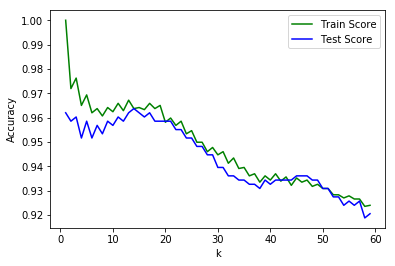

In [72]:
#-plot grid scores 

x_axis = range(1,60)
%matplotlib inline
plt.plot(x_axis,knn_classifier.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, knn_classifier.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [73]:
####a3.evaluate the classifier
from sklearn.metrics import roc_curve, roc_auc_score

#-create model with best parameters 
knn_classif= KNeighborsClassifier(14)
#-train model 
knn_classif.fit(Xc_train,Yc_train)
#-create predicted probabilities 
Yc_pred=knn_classif.predict_proba(Xc_test)[:,1]
#-create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Yc_test, Yc_pred)




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


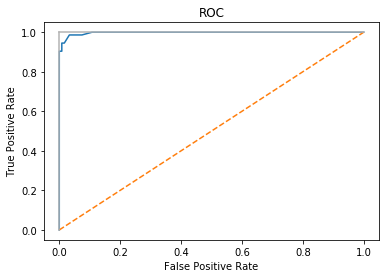

In [74]:
#-plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
#-calculate area under curve
roc_auc_score(Yc_test,Yc_pred)

0.9973961281557794

In [76]:
#-another way to evaluate-classification report
from sklearn.metrics import classification_report,accuracy_score
Yc_pred = knn_classifier.predict(Xc_test)
print(classification_report(Yc_test, Yc_pred))
print(accuracy_score(Yc_test, Yc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.99      0.95      0.97        73

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194

0.9742268041237113


In [77]:
line = 'Knn Classifier'+','+str(knn_classifier.best_params_) +','+','+ ","+','+','+str(roc_auc_score(Yc_test,Yc_pred)) + ',' + str(accuracy_score(Yc_test, Yc_pred)) + '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()


In [78]:
#LOGISTIC REGRESSION

In [79]:
####b1.apply model

from sklearn.linear_model import LogisticRegression
#create logistic regression
logistic=LogisticRegression()

####b2.find best parameter(s)

#-create space of candidate values 

search_space=[{"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}]

#-create grid search 
logit=GridSearchCV(logistic,search_space,cv=5,verbose=0).fit(Xc_train,Yc_train)

#-best params
print(logit.best_params_)

#{'C': 1000, 'penalty': 'l2'}



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

{'C': 1000, 'penalty': 'l2'}


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d a

In [80]:
####b3.evaluate the classifier
from sklearn.metrics import roc_curve, roc_auc_score

#-create model with best parameters 
logit_class= LogisticRegression(C=1000,penalty='l2')
#-train model 
logit_class.fit(Xc_train,Yc_train)
#-create predicted probabilities 
Yc_pred=logit_class.predict_proba(Xc_test)[:,1]
#-create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Yc_test, Yc_pred)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


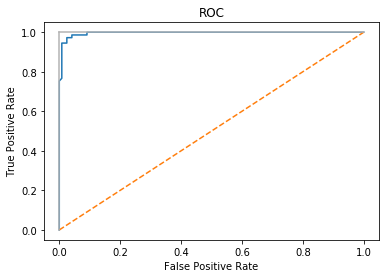

In [81]:
#-plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
#-calculate area under curve
roc_auc_score(Yc_test,Yc_pred)

0.9959809804143552

In [83]:
#-another way to evaluate-classification report
from sklearn.metrics import classification_report,accuracy_score

Yc_pred = logit_class.predict(Xc_test)
print(classification_report(Yc_test, Yc_pred))
print(accuracy_score(Yc_test, Yc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       121
           1       0.65      1.00      0.78        73

   micro avg       0.79      0.79      0.79       194
   macro avg       0.82      0.83      0.79       194
weighted avg       0.87      0.79      0.80       194

0.7938144329896907


In [84]:
line = 'logistic regression'+','+str(logit.best_params_) +","+','+','+','+ str(roc_auc_score(Yc_test,Yc_pred)) + ',' + str(accuracy_score(Yc_test, Yc_pred)) + '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()


In [85]:
###c.linearSVC

####c1.apply model

from sklearn.svm import SVC,LinearSVC
SVC = LinearSVC(dual=False )
SVC.fit(Xc_train,Yc_train)

####c2.find best parameter(s)

#-create space of candidate values 

search_space=[{'C': [1, 10, 100, 1000],'penalty':['l1','l2']}]


#-create grid search 
linearSVC=GridSearchCV(SVC,search_space,cv=5,verbose=0).fit(Xc_train,Yc_train)

#-best PARAMS
print(linearSVC.best_params_)
#best 'C'=10 penalty='l1'



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/py

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWar

{'C': 10, 'penalty': 'l1'}


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
####c3.evaluate the classifier
from sklearn.metrics import roc_curve, roc_auc_score

#-create model with best parameters 
SVCl_class= LinearSVC(dual=False,C=10,penalty='l1')

#-train model 
SVCl_class.fit(Xc_train,Yc_train)

#-create predicted probabilities 
Yc_pred=SVCl_class.predict(Xc_test)

#-create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Yc_test, Yc_pred)



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


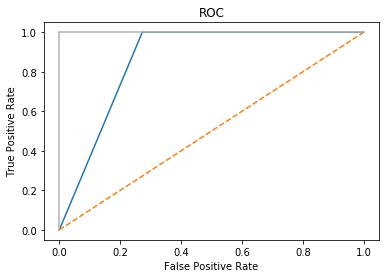

In [87]:
#-plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
#-calculate area under curve
roc_auc_score(Yc_test,Yc_pred)

0.8636363636363636

In [89]:
#-another way to evaluate-classification report
from sklearn.metrics import classification_report,accuracy_score
Yc_pred = SVCl_class.predict(Xc_test)
print(classification_report(Yc_test, Yc_pred))
print(accuracy_score(Yc_test, Yc_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       121
           1       0.69      1.00      0.82        73

   micro avg       0.83      0.83      0.83       194
   macro avg       0.84      0.86      0.83       194
weighted avg       0.88      0.83      0.83       194

0.8298969072164949


In [90]:
line = 'linear SVC'+','+str(linearSVC.best_params_)+","+','+','+','+ str(roc_auc_score(Yc_test,Yc_pred)) + ',' + str(accuracy_score(Yc_test, Yc_pred)) + '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()


In [91]:
###d.svc with kernel

####d1.apply model

from sklearn import svm
SVCk =svm.SVC()
SVCk.fit(Xc_train,Yc_train)

####d2.find best parameter(s)

#-create space of candidate values 

search_space=[{'kernel':['rbf'],'gamma': [0.005, 0.004, 0.003, 0.002, 0.001],
                     'C': [0.1,1, 10, 100, 1000]},
             {'kernel':['linear'],'C': [1, 10, 100, 1000]}]
                    
#-create grid search 
kernelsvc= GridSearchCV(SVCk,search_space,cv=5,verbose=0).fit(Xc_train,Yc_train)

#-best PARAMS
print(kernelsvc.best_params_)
#{'C': 100, 'kernel': 'linear'}




/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 100, 'kernel': 'linear'}


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [92]:
####d3-evaluate the classifier
from sklearn.metrics import roc_curve, roc_auc_score

#-create model with best parameters 
SVCk_class= svm.SVC(C=100, kernel='linear',probability=True)

#-train model 
SVCk_class.fit(Xc_train,Yc_train)

#-create predicted probabilities 
Yc_pred=SVCk_class.predict_proba(Xc_test)[:,1]

#-create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Yc_test, Yc_pred)




/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


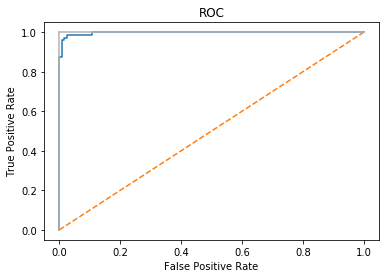

In [93]:
#-plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
#-calculate area under curve
roc_auc_score(Yc_test,Yc_pred)

0.9972829163364656

In [95]:
#-another way to evaluate-classification report
from sklearn.metrics import classification_report,accuracy_score
Yc_pred = SVCk_class.predict(Xc_test)
print(classification_report(Yc_test, Yc_pred))
print(accuracy_score(Yc_test, Yc_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       121
           1       0.58      1.00      0.73        73

   micro avg       0.73      0.73      0.73       194
   macro avg       0.79      0.78      0.73       194
weighted avg       0.84      0.73      0.72       194

0.7268041237113402


In [96]:
line = 'kernel SVC'+','+str(kernelsvc.best_params_)+','+','+','+','+ str(roc_auc_score(Yc_test,Yc_pred)) + ',' + str(accuracy_score(Yc_test, Yc_pred)) + '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()


In [97]:
###e. Decision Tree

####e1.apply model

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(Xc_train, Yc_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(Xc_train, Yc_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(Xc_test, Yc_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.376


In [98]:
####e2.find best parameter(s)

#create space of candidate values 

search_space=[{'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]

#create grid search 
dtree_classifier=GridSearchCV(dtree,search_space,cv=5,verbose=0).fit(Xc_train,Yc_train)

#best PARAMS
print(dtree_classifier.best_params_)




{'max_depth': 2, 'max_features': None}


In [99]:
####e3.evaluate the classifier

from sklearn.metrics import roc_curve, roc_auc_score

#create model with best parameters 
dtree_class= DecisionTreeClassifier(random_state=0,max_depth= 2, max_features=None)

#train model 
dtree_class.fit(Xc_train,Yc_train)

#create predicted probabilities 
Yc_pred=dtree_class.predict_proba(Xc_test)[:,1]

#create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(Yc_test, Yc_pred)



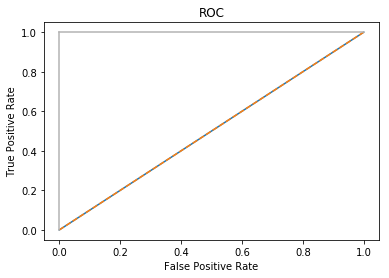

In [100]:
#-plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
#-calculate area under curve
roc_auc_score(Yc_test,Yc_pred)

0.5

In [102]:
#-classification report
from sklearn.metrics import classification_report,accuracy_score
Yc_pred = dtree.predict(Xc_test)
print(classification_report(Yc_test, Yc_pred))
print(accuracy_score(Yc_test,Yc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.38      1.00      0.55        73

   micro avg       0.38      0.38      0.38       194
   macro avg       0.19      0.50      0.27       194
weighted avg       0.14      0.38      0.21       194

0.37628865979381443


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
line = 'decision tree classifier'+','+str(dtree_classifier.best_params_)+','+','+","+','+ str(roc_auc_score(Yc_test,Yc_pred)) + ',' + str(accuracy_score(Yc_test, Yc_pred)) + '\n'
f = open('Project1.csv','a')
f.write(line)
f.close()



In [104]:
####THE BEST CLASSIFIER IS THE KNN CLASSIFIER WITH THE GREATEST roc_auc_score 0.968470508 AND THE GREATEST ACCURACY SCORE 0.974226804